# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### Описание данных:

<br> · airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
<br> · balcony — число балконов
<br> · ceiling_height — высота потолков (м)
<br> · cityCenters_nearest — расстояние до центра города (м)
<br> · days_exposition — сколько дней было размещено объявление (от публикации до снятия)
<br> · first_day_exposition — дата публикации
<br> · floor — этаж
<br> · floors_total — всего этажей в доме
<br> · is_apartment — апартаменты (булев тип)
<br> · kitchen_area — площадь кухни в квадратных метрах (м²)
<br> · last_price — цена на момент снятия с публикации
<br> · living_area — жилая площадь в квадратных метрах(м²)
<br> · locality_name — название населённого пункта
<br> · open_plan — свободная планировка (булев тип)
<br> · parks_around3000 — число парков в радиусе 3 км
<br> · parks_nearest — расстояние до ближайшего парка (м)
<br> · ponds_around3000 — число водоёмов в радиусе 3 км
<br> · ponds_nearest — расстояние до ближайшего водоёма (м)
<br> · rooms — число комнат
<br> · studio — квартира-студия (булев тип)
<br> · total_area — площадь квартиры в квадратных метрах (м²)
<br> · total_images — число фотографий квартиры в объявлении

In [1]:
# Импортируем библиотеки для начала работы
import pandas as pd
import math
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Загрузим датастет и взглянем на его первые 10 строк
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Уже наблюдаем пропуски во многих столбцах, взглянем на общую информацию по таблица, чтобы точно определить в скольких столбцах присутствуют пропуски:

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

Так как колонок достаточно много, такой вариант всё еще недостаточно информативен, построим график для более наглядного представления пропусков, на котором будет указан процент пропусков по отношению к общему количеству строк в нашем датасете.

Также необходимо будет заменить тип данных в следующих столбцах:
<br>
<br> **Last_price** - *int*: для улучшения читаемости данных
<br> **Floors_total** - *int*: так как число этажей не может быть дробным числом
<br> **Balcony** - *int*: по аналогии с floors_total
<br> **Столбцы, связанные с расстоянием до центра города, аэропорта, парков, водоемов** - *int*: для улучшения читаемости данных
<br> **Столбцы, связанные с количеством ближайших парков/водоемов** - *int*: так как число парков/водоемов не может быть дробным числом
<br> **Days_exposition** - *int с округлением вниз*: так как кол-во дней с момента публикации тоже не может быть дробным числом

### Описание пропусков в данных:

,0
Апартаменты/Квартира,88.29
Расстояние до ближайшего парка(м),65.91
Расстояние до ближайшего водоёма(м),61.56
Площадь кухни(м²),48.61
Высота потолков,38.80
Расстояние до ближайшего аэропорта(м),23.38
Расстояние до центра города(м),23.29
Число водоёмов в радиусе 3 км,23.28
Число парков в радиусе 3 км,23.28
Кол-во дней с момента публикации,13.42


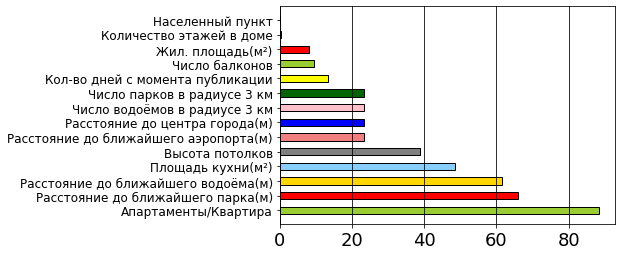

In [4]:
percentage_of_nans = df.isna().mean().round(4) * 100
percentage_of_nans = percentage_of_nans[percentage_of_nans > 0]
percentage_of_nans.index = (['Высота потолков', 'Количество этажей в доме', 'Жил. площадь(м²)', 'Апартаменты/Квартира', 
                             'Число балконов', 'Площадь кухни(м²)', 'Населенный пункт', 'Расстояние до ближайшего аэропорта(м)', 
                             'Расстояние до центра города(м)', 'Число парков в радиусе 3 км', 'Расстояние до ближайшего парка(м)',
                            'Число водоёмов в радиусе 3 км', 'Расстояние до ближайшего водоёма(м)', 'Кол-во дней с момента публикации']
                           )
percentage_of_nans = percentage_of_nans.sort_values(ascending = False)
colors = ['yellowgreen','red','gold','lightskyblue','grey','lightcoral','blue','pink', 'darkgreen','yellow']

display(percentage_of_nans.to_frame())
x = percentage_of_nans.keys()
y = percentage_of_nans.values

fig, ax = plt.subplots()

plt.yticks(fontsize=12)
plt.xticks(fontsize=18)

plt.grid(axis = 'x', color = 'black')
plt.barh(x, y, color = colors, edgecolor = 'black', height = 0.5)

plt.show()

<br> Видим что **наибольшее количество пропусков находится в столбце 'is_apartment'**, что скорее всего, связано либо с отсутствием понимания у людей разницы между апартаментами и квартирой, либо с ошибкой при проставлении данного параметра в объявлении (например, из выпадающего списка необходимо было выбрать два параметра "Апартаменты/Не апартаменты", и при отсутствии какого-либо выбора возникает пропуск в параметре).

Так же наблюдаем **большое количество пропусков в параметрах, связанных с числом парков/водоемов, и расстояниями до центра города, аэропорта, парка/водоема**. Так как эти параметры должны быть просчитаны системой автоматически, напрашивается вывод, что она дала сбой. Скорее всего, не смогла определить точный адрес/координаты/населенный пункт и рассчитать расстояние. 

Пропуски в столбце **"Площадь кухни"** можно будет попытаться заполнить через соотношение жилой площади к общей площади

Пропуски в **высоте потолков** могут быть объяснены тем, что большинство людей, скорее всего, попросту не знают, либо не смогли её вычислить в совей квартире. Поэтому заполним пропуски медианой, так как это не является решающим фактором в определении цены.

Пропуски в столбце **с числом балконов** объясняются тем, что в квартире попросту отсутствуют балконы, поэтому можно будет заполнить пропуски нулями.

Пропуски в **жилой площади**, по аналогии с площадью кухни, можно будет попытаться заполнить через соотношение кухонной и общей площадью.

**Оставшиеся столбцы с пропусками** занимают меньше 1% от нашего датасета, поэтому от строк с отсутствующим населенным пунктом можно смело избавиться, а количество этажей в доме можно заменить на медианное значение, так как это тоже не является основополагающим фактором в определении стоимости квартиры


### Просмотр основных стат. параметров данных:

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Из данной таблицы, можем заметить следующие аномалии и примечательные значения:
<br> Максимальная площадь квартиры - 900 кв метров, при медиане в 52м², и верхнем квартиле в 70м². Вероятнее всего, это может быть какой-то элитный дом/особняк/жилье.
<br> Максимальная высота потолка - 100 метров, что физически невозможно, учитывая что 10 метров - в среднем высота пятиэтажного здания
<br> Максимальная жилая площадь - 409 кв. метров, при медиане в 30м², и верхнем квартиле в 42м². Причина - аналогична с площадью квартиры.

<br> Самый долгий срок продажи квартиры - 1580 дней, или почти 4.5 года. Возможно, но маловероятно, скорее всего объявление по какой-то причине оставалось актуальным.





По итогу, будем следовать следующему плану работы для подготовки анализа по данному датасету:

<br> **1. Обработка пропусков**:

···   **1.1. Замена пропусков в is_apartment:** посмотрим на строки без пропусков, взглянем на текущее соотношение. Если оно адекватное - будем использовать его для замены пропусков. Если же нет - заполним все пропуски нулями.

···     **1.2. Заменим пропуски в balcony:** все пропуски заменим на 0

···     **1.3. Обработаем пропуски в ceiling_height:** взглянем на распределение по высоте, и определим каким образом будем обрабатывать пропуски.

···     **1.4. Обработаем пропуски в living_area и kitchen_area**, используя соотношения к общей площади, там где это возможно.

···     **1.5. Проверим, находятся ли пропуски по столбцам с количеством парков/водоемов и расстояниями до них, аэропорта, центра города**. По возможности, заполним пропуски, опираясь на населенный пункт и уже имеющееся по нему расстояние и количество.

···     **1.6.Обработаем строки с отсутствующими населенными пунктами.**

···     **1.7. Заменим пропуски в количестве этажей в доме** медианным значением.

<br> **2. Замена типов данных:**

···     **Last_price** - *int*: для улучшения читаемости данных

···     **Floors_total** - *int*: так как число этажей не может быть дробным числом

···     **Balcony** - *int*: по аналогии с floors_total

···     **Столбцы, связанные с расстоянием до центра города, аэропорта, парков, водоемов** - *int*: для улучшения читаемости данных

···     **Столбцы, связанные с количеством ближайших парков/водоемов** - *int*: так как число парков/водоемов не может быть дробным числом

···     **Days_exposition** - *int с округлением вниз*:

### Обработка пропусков:

#### Начнем с заполнения пропусков в столбце "is_apartment".
Для этого посмотрим на общее количество пропусков, и на соотношение в уже заполненных строках:

In [6]:
print('Количество пропусков в столбце "is_apartment" =' ,len(df[df['is_apartment'].isna() == True]))
display(df['is_apartment'].value_counts())

Количество пропусков в столбце "is_apartment" = 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Видим что соотношение выглядит достаточно правдоподобно, поэтому пропуски будем заполнять в соответствии с сложившейся структурой, для этого вычислим точное процентное соотношение апартаментов к квартирам, и на основании этого заменим пропуски.

In [7]:
aparts_ratio = (len(df[df['is_apartment'] == True]) / (len(df[df['is_apartment'].notna() == True]))) 
aparts_ratio = round(aparts_ratio, 3)
print('Доля апартаментов к строкам без пропусков = ', round((aparts_ratio * 100), 2), '%')

#Рассчитаем количество строк с пропусками, которые будут заполнены типом "апартаменты"
prop = len(df[df['is_apartment'].isna() == True]) * aparts_ratio
prop = math.ceil(prop)

print('Количество строк с пропусками, которые будут заполнены типом "апартаменты" = ', prop)

Доля апартаментов к строкам без пропусков =  1.8 %
Количество строк с пропусками, которые будут заполнены типом "апартаменты" =  377


In [8]:
aparts = df["is_apartment"]

aparts = aparts.fillna(value = True, limit = prop)
aparts = aparts.fillna(value = False)

aparts = aparts.replace(False, int(0))
aparts = aparts.replace(True, int(1))

print('Количество пропусков в столбце "is_apartment" после обработки = ', len(aparts[aparts.isna() == True]))

print('Количество квартир в столбце "is_apartment" после обработки =', aparts[aparts == 0].count())
print('Количество апартаментов в столбце "is_apartment" после обработки = ', aparts[aparts == 1].count())

print('Доля квартир =', (round((aparts[aparts == 0].count() / len(aparts) * 100), 2)), "%")
print('Доля апартаментов =', (round((aparts[aparts == 1].count() / len(aparts) * 100), 2)), "%")

Количество пропусков в столбце "is_apartment" после обработки =  0
Количество квартир в столбце "is_apartment" после обработки = 23272
Количество апартаментов в столбце "is_apartment" после обработки =  427
Доля квартир = 98.2 %
Доля апартаментов = 1.8 %


Замена пропусков прошла успешна, теперь можем заменить столбец 'is_apartment' в исходном датафрейме, полученными значениями

In [9]:
df['is_apartment'] = aparts

#### Заменим пропуски в столбце balcony:
Для начала проверим уникальные значения в этом столбце и Подсчитаем количество пропусков в balcony:

In [10]:
display(df['balcony'].value_counts())
print('Количество пропусков в столбце "balcony" = ',len(df[df['balcony'].isna() == True]))

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Количество пропусков в столбце "balcony" =  11519


Такое количество пропусков можно объяснить тем, что балкон в данной квартире попросту отсутствует. Соответственно заменим пропуски в этом столбце нулями.

In [11]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество пропусков в столбце "balcony" = ',len(df[df['balcony'].isna() == True]))

Количество пропусков в столбце "balcony" =  0


#### Теперь заполним пропуски в столбце ceiling_height:
Для начала взглянем на строки с аномально высокими значениями, и построим две гистограммы.

Количество строк с пропусками в столбце ceiling_height = 23699


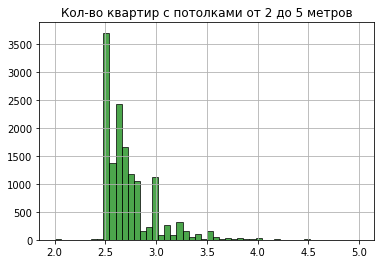

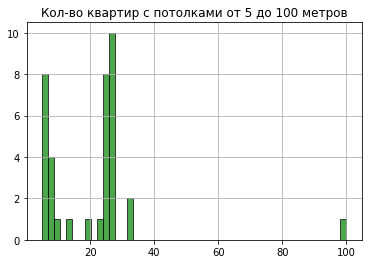

In [12]:
print('Количество строк с пропусками в столбце ceiling_height =', len((df['ceiling_height'].isna() == True)))
cleared_ceiling = df.loc[:, ['ceiling_height']]
cleared_ceiling = cleared_ceiling[(cleared_ceiling['ceiling_height'].notna() == True)]

cleared_ceiling.hist(range = (2, 5), 
                     bins = 50, 
                     grid = True, 
                     color = 'green', 
                     alpha = 0.7,
                     edgecolor = 'black')
plt.title('Кол-во квартир с потолками от 2 до 5 метров')
plt.show()

cleared_ceiling.hist(range = (5, 100), 
                     bins = 50, 
                     grid = True, 
                     color = 'green',
                     alpha = 0.7,
                     edgecolor = 'black')
plt.title('Кол-во квартир с потолками от 5 до 100 метров')
plt.show()

Вероятность того, что есть квартиры с потолками выше 10 метров(т.е. выше четырехэтажного здания) практически нулевая. К тому же, таких значений достаточно мало, следовательно они мало повлияют на итоговые результаты. Поэтому смело избавляемся от таких строк.

In [13]:
df = df.drop((df[df['ceiling_height'] > 10]).index)

# Проверим правильность
print('Количество строк с потолками свыше 10 метров =', len(df.loc[(df['ceiling_height'] > 10)]))

Количество строк с потолками свыше 10 метров = 0


Оставшие пропуски заполним медианным значением, так как по прошлым графикам заметно, что количество строк, с потолками даже выше 3.25 метров, занимает очень малую часть в нашем датасете. К тому же, на графике видны пики при высоте потолка в 2.5 и 3 метра. Скорее всего, это объясняется тем что либо людям в сервисе предоставлялся выбор из интервалов и возможность вписать собственное значение. Как мы видим, большинство выбрало приблизительное значение, что дает нам возможность усреднить данные по этому столбцу.

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Количество строк с пропусками в столбце ceiling_height =', len((df[df['ceiling_height'].isna()] == True)))

Количество строк с пропусками в столбце ceiling_height = 0


#### Обработаем пропуски в столбцах living_area и kitchen_area:

Количество строк с пропусками в столбце living_area = 1903


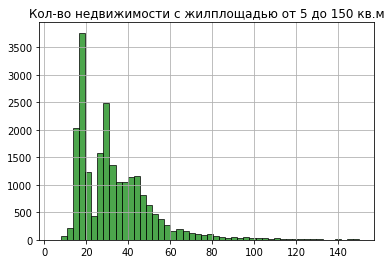

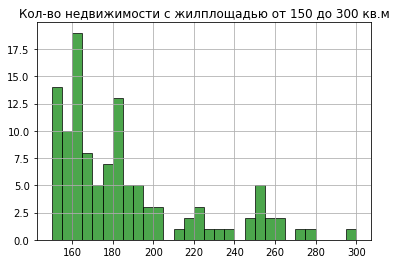

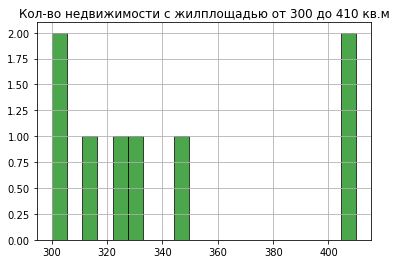

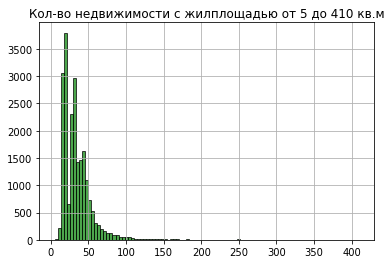

In [15]:
print('Количество строк с пропусками в столбце living_area =', len((df[df['living_area'].isna()] == True)))

# Напишем функцию для вывода графиков по столбцу living_area с разными интервалами:
def plot_living_area(ranging, bins, title):
    df['living_area'].hist(range=ranging,
                           bins = bins,
                           grid = True,
                           color = 'green',
                           alpha = 0.7,
                           edgecolor = 'black')
    plt.title(title)
    plt.show()

# Выведем четыре графика с разными интервалами. Последний график является общим.
plot_living_area((5,150), 50, 'Кол-во недвижимости с жилплощадью от 5 до 150 кв.м')
plot_living_area((150, 300), 30, 'Кол-во недвижимости с жилплощадью от 150 до 300 кв.м')
plot_living_area((300, 410), 20, 'Кол-во недвижимости с жилплощадью от 300 до 410 кв.м')
plot_living_area((5, 410), 100, 'Кол-во недвижимости с жилплощадью от 5 до 410 кв.м')

По графикам видно, что значения распределены равномерно, но так как истинная причина появления пропусков в данном столбце нам неизвестна.
Проверим, имеется ли возможность заполнить пропуски через соотношение кухонной площади к общей.
Для этого отфильтруем датасет по трем признакам: пропуск в 'living_area', и не пропуски в 'total_area' и 'kitchen_area'

In [16]:
print('Количество строк, с пропусками по столбцу "living_area" =', 
     len(df[df['living_area'].isna() == True]))

print('Количество строк, в которых имеется возможность заполнить пропуски по столбцу "living_area" =', 
    len(df[(df['living_area'].isna() == True) & (df['total_area'].notna() == True) & (df['kitchen_area'].notna() == True)]))

Количество строк, с пропусками по столбцу "living_area" = 1903
Количество строк, в которых имеется возможность заполнить пропуски по столбцу "living_area" = 439


Чуть больше 20% пропусков по данному столбцу имеется возможность заполнить, воспользуемся ею.
Для этого напишем функцию, которую используя дважды, сможем заполнить два столбца сразу.

In [17]:
def area_fill(column_fill, column_ready):
    #Проверяем правильность выполнения
    print('Количество строк, в которых имеется возможность заполнить пропуски по столбцу', df[column_fill].name, '=', 
        len(df[(df[column_fill].isna() == True) & (df['total_area'].notna() == True) & (df[column_ready].notna() == True)]))

    print('Количество строк, с пропусками по столбцу', df[column_fill].name, '=', 
         len(df[df[column_fill].isna() == True]))
    
    
    area_df = df[(df[column_fill].isna() == True) & (df['total_area'].notna() == True) & (df[column_ready].notna() == True)]

    #Избавимся от лишних столбцов
    area_df = area_df.loc[:, ['living_area', 'total_area', 'kitchen_area']]

    #Рассчитаем значения жилой площади для заполнения пропусков и заменим пропуски в отдельном датафрейме:
    area_df[column_fill] = (((area_df[column_ready] / area_df['total_area']) - 1) * -(area_df['total_area']))

    #Заполняем пропуски в нашем датасете
    df[column_fill] = df[column_fill].fillna(value = area_df[column_fill])

    #Проверяем правильность выполнения
    print('Проверка: Возможность заполнить пропуски по столбцу', df[column_fill].name, '=', 
        len(df[(df[column_fill].isna() == True) & (df['total_area'].notna() == True) & (df[column_ready].notna() == True)]))

    print('Проверка: Количество строк, с пропусками по столбцу', df[column_fill].name, '=', 
         len(df[df[column_fill].isna() == True]))
    print('')

In [18]:
area_fill('living_area', 'kitchen_area')
area_fill('kitchen_area', 'living_area')

Количество строк, в которых имеется возможность заполнить пропуски по столбцу living_area = 439
Количество строк, с пропусками по столбцу living_area = 1903
Проверка: Возможность заполнить пропуски по столбцу living_area = 0
Проверка: Количество строк, с пропусками по столбцу living_area = 1464

Количество строк, в которых имеется возможность заполнить пропуски по столбцу kitchen_area = 809
Количество строк, с пропусками по столбцу kitchen_area = 2273
Проверка: Возможность заполнить пропуски по столбцу kitchen_area = 0
Проверка: Количество строк, с пропусками по столбцу kitchen_area = 1464



Оставшиеся пропуски заполнять средним не имеет практического смысла, поэтому оставим пропущенные значения в этом столбце так как есть.

#### Проверим, находятся ли пропуски по столбцам с количеством парков/водоемов и расстояниями до них, аэропорта, центра города:

Попытаемся самостоятельно заполнить данные пропуски, опираясь на населенный пункт.
Проверим, находятся ли пропуски в столбцах cityCenters_nearest, parks_around3000, ponds_around3000 и airports_nearest 
в одних и тех же строках 

Отфильтруем датасет по этим столбцам:

In [19]:
df_infrastructure = df.loc[:, ['cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'airports_nearest', 'locality_name']]
df_infrastructure = df_infrastructure.loc[(df['cityCenters_nearest'].isna() == True) & 
                                          (df['parks_around3000'].isna() == True) &
                                          (df['ponds_around3000'].isna() == True) &
                                          (df['airports_nearest'].isna() == True) &
                                          (df['locality_name'] != 'Санкт-Петербург')]

print('Количество строк с пропусками в столбцах =', len(df_infrastructure))

Количество строк с пропусками в столбцах = 5448


Также проверим сколько уникальных населенных пунктов с пропусками присутствует в нашем датасете:

In [20]:
print('Кол-во уникальных населенных пунктов с пропусками = ' ,len(df_infrastructure['locality_name'].value_counts().loc[lambda x : x == 1]))

Кол-во уникальных населенных пунктов с пропусками =  103


Уникальных населенных пунктов с пропусками в столбцах с расстояниями достаточно много, решение избавиться от них приведет к снижению репрезентативности нашего датасета. Поэтому просто оставим их так как есть.

<br> Теперь заполним возможные оставшиеся строки, средним значением и медианой:
    <br> Для расстояния до центра и аэропорта будем использовать среднее значение по населенному пункту
    <br> Для количества парков и водоемов будем использовать медиану, так как число парков и водоемов не может быть дробным числом.

In [21]:
def fillna_nearest_around(columns_list):
    i = 0
    for column in columns_list:
        print('Количество строк без пропусков в столбце', column, '=', len(df[column]))
        old_len = len(df[column])
        
        #Среднее для первых двух столбцов, медиана для последних двух столбцов в списке 
        if i < 1:
            df[column] = df[column].fillna(df.groupby('locality_name')[column].transform('mean'))
        else:
            df[column] = df[column].fillna(df.groupby('locality_name')[column].transform('median'))
        print('Заполнено пропусков в столбце', column, '=', (len(df[column]) - old_len), 'строк.')
        print('')
        i += 1
        
columns_list = ['cityCenters_nearest', 'airports_nearest', 'parks_around3000', 'ponds_around3000']              
fillna_nearest_around(columns_list)            

Количество строк без пропусков в столбце cityCenters_nearest = 23674
Заполнено пропусков в столбце cityCenters_nearest = 0 строк.

Количество строк без пропусков в столбце airports_nearest = 23674
Заполнено пропусков в столбце airports_nearest = 0 строк.

Количество строк без пропусков в столбце parks_around3000 = 23674
Заполнено пропусков в столбце parks_around3000 = 0 строк.

Количество строк без пропусков в столбце ponds_around3000 = 23674
Заполнено пропусков в столбце ponds_around3000 = 0 строк.



С помощью функции, видим что оставшиеся пропуски появились именно из-за наименование населенного пункта, так как используя наименование населенного пункта, функция не сработала, соответственно, в строках с определенными населенными пункта система не смогла проставить расстояние до центра города, аэропорта, подсчитать количество водоемов и парков поблизости. Поэтому заполнить пропуски в таких строках не представляется возможным, оставляем всё так как есть.

#### Обрабатываем строки с отсутствующим населенным пунктом

In [22]:
print('Количество строк с отсутствующим населенным пунктом =', len(df[df['locality_name'].isna() == True]))

Количество строк с отсутствующим населенным пунктом = 49


Достаточно мало, к тому же заполнить пропуски по этому столбцу не представляется возможным. Поэтому просто избавляемся от них. 

In [23]:
df.dropna(subset=['locality_name'], inplace=True)
print('Количество строк с отсутствующим населенным пунктом =', len(df[df['locality_name'].isna() == True]))

Количество строк с отсутствующим населенным пунктом = 0


#### Заменим пропуски в количестве этажей в доме медианным значением.

In [24]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
print('Количество пропусков в столбце "floors_total" =', (len(df[df['floors_total'].isna() == True])))

Количество пропусков в столбце "floors_total" = 0


Все этапы обработки пропусков выполнены, проверим её результативность с помощью графика, который мы выводили уже ранее.

Расстояние до ближайшего парка(м)        65.90
Расстояние до ближайшего водоёма(м)      61.58
Число водоёмов в радиусе 3 км            22.76
Число парков в радиусе 3 км              22.76
Расстояние до центра города(м)           22.76
Расстояние до ближайшего аэропорта(м)    22.76
Кол-во дней с момента публикации         13.43
Площадь кухни(м²)                         6.18
Жил. площадь(м²)                          6.18
dtype: float64


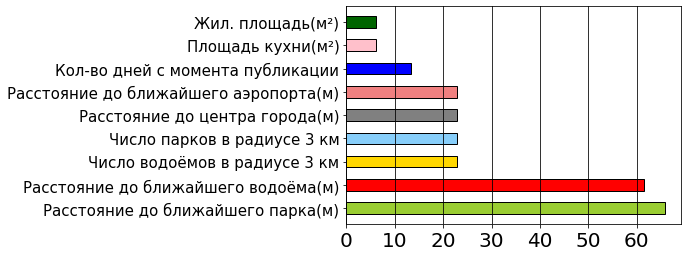

In [25]:
percentage_of_nans = df.isna().mean().round(4) * 100
percentage_of_nans = percentage_of_nans[percentage_of_nans > 0]
percentage_of_nans.index = (['Жил. площадь(м²)', 'Площадь кухни(м²)', 
                             'Расстояние до ближайшего аэропорта(м)', 'Расстояние до центра города(м)', 
                             'Число парков в радиусе 3 км', 'Расстояние до ближайшего парка(м)',
                             'Число водоёмов в радиусе 3 км', 'Расстояние до ближайшего водоёма(м)', 
                             'Кол-во дней с момента публикации'])

percentage_of_nans = percentage_of_nans.sort_values(ascending = False)

colors = ['yellowgreen','red','gold','lightskyblue','grey','lightcoral','blue','pink', 'darkgreen','yellow', 'violet','magenta']
print(percentage_of_nans)
x = percentage_of_nans.keys()
y = percentage_of_nans.values

fig, ax = plt.subplots()

plt.yticks(fontsize=15)Минуты разговора, число сообщений и объем потраченного интернет-трафика по тарифу «Ультра» имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Кроме того, выбросов в рамках более дешевого тарифа существенно больше.
plt.xticks(fontsize=20)

plt.grid(axis = 'x', color = 'black')
plt.barh(x, y, color = colors, edgecolor = 'black', height = 0.5)

plt.show()

Основные параметры теперь выглядят более репрезентативно, а заполнить пропуски в оставшихся параметрах не представляется возможным, поэтому переходим к следующему этапу:

#### Замена типов данных:

Для этого создадим два списка, в которых будут указаны наименования колонок которые нужно привести к типу int и float соответственно.

In [26]:
cols_to_int = ['last_price', 'floors_total', 'floor', 'balcony', 'airports_nearest', 'cityCenters_nearest',
              'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

cols_to_float1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

In [27]:
# Заменяем типы данных:
for column in cols_to_int:
    df[column] = df[df[column].notnull()][column].astype('int').round(0)

for column in cols_to_float1:
    df[column] = df[df[column].notnull()][column].astype('float').round(1)

Также переведем цену из миллионов в тысячи и дату в читаемый вид:

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['last_price'] = (df['last_price'] / 1000 * 1.0).round().astype(int)

# Проверим правильность выполнения:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23625 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23625 non-null int64
last_price              23625 non-null int64
total_area              23625 non-null float64
first_day_exposition    23625 non-null datetime64[ns]
rooms                   23625 non-null int64
ceiling_height          23625 non-null float64
floors_total            23625 non-null int64
living_area             22165 non-null float64
floor                   23625 non-null int64
is_apartment            23625 non-null float64
studio                  23625 non-null bool
open_plan               23625 non-null bool
kitchen_area            22165 non-null float64
balcony                 23625 non-null int64
locality_name           23625 non-null object
airports_nearest        18248 non-null float64
cityCenters_nearest     18248 non-null float64
parks_around3000        18248 non-null float64
parks_nearest           8056 non-null float64
ponds_aroun

None

### Вывод:
Избавились от самых многочисленных пропусков в нашем датасете, там где это возможно, заполнили средними/медианными значениями. Удалили строки без наименования населенного пункта, заменили типы данных на необходимые.
Теперь можем добавить нужные для анализа показатели, и приступать непосредственно к самому анализу данных:

## Добавление необходимых показателей:

Для более подробного проведения анализа, нам необходимы следующие показатели: 

···     Цена за квадратный метр
<br>···     День недели, месяц и год публикации объявления
<br>···     Категория этажа квартиры: первый, последний, другой
<br>···     Соотношение жилой и общей площади
<br>···     Соотношение площади кухни к общей

### Начнем с добавления цены квадратного метра:

За условное обозначение будем считать тыс. руб.

In [29]:
df['price_per_m2'] = (df['last_price'] / df['total_area'] * 1000).astype(int)

### Теперь добавим день недели, месяц, и год публикации:

In [30]:
df['exposition_day'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

### Добавим категории по этажам:

In [31]:
df.loc[df['floor'] == 1, 'floor_category'] = 'Первый этаж'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'Последний этаж'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'Другой'


### Рассчитаем соотношение жилой и кухонной площади к общей, и добавим их в наш датасет:

In [32]:
df['part_of_living_area'] = (df['living_area'] / df['total_area'] * 100)
df['part_of_kitchen_area'] = (df['kitchen_area'] / df['total_area'] * 100)

df['part_of_living_area'] = df[df['part_of_living_area'].notnull()]['part_of_living_area'].astype('float').round(1)
df['part_of_kitchen_area'] = df[df['part_of_kitchen_area'].notnull()]['part_of_kitchen_area'].astype('float').round(1)


Взглянем на новые столбцы:

In [33]:
new_columns = ['price_per_m2', 'exposition_day', 'exposition_month', 'exposition_year',
              'floor_category', 'part_of_living_area', 'part_of_kitchen_area']
display(df[new_columns].head(10))

,price_per_m2,exposition_day,exposition_month,exposition_year,floor_category,part_of_living_area,part_of_kitchen_area
0,120370,3,3,2019,Другой,47.2,23.1
1,82920,1,12,2018,Первый этаж,46.0,27.2
2,92785,3,8,2015,Другой,61.2,14.8
3,408176,4,7,2015,Другой,NaN,NaN
4,100000,1,6,2018,Другой,32.0,41.0
5,95065,0,9,2018,Другой,47.4,29.9
6,99195,3,11,2017,Другой,28.4,38.6
7,110544,3,4,2019,Другой,73.6,26.4
8,87349,2,5,2018,Другой,46.4,26.5
9,88524,6,2,2017,Другой,71.5,10.7


Новые показатели были успешно рассчитаны, и добавлены в наш датасет. Теперь можем приступать к анализу данных.

## Исследовательский анализ данных:

### Изучение основных параметров

Начнем с изучения основных параметров: цена, число комнат, высота потолков.
Для этого построим гистограммы по площади недвижимости, стоимости и высоте потолков. Для количества комнат построим круговую диаграмму:

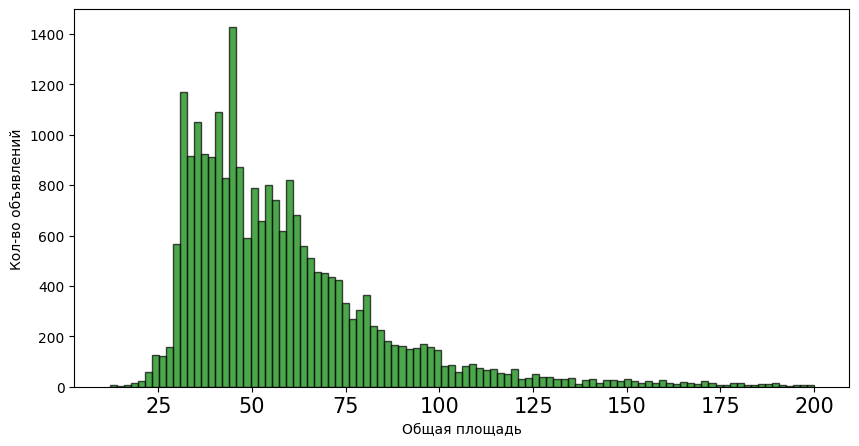

In [34]:
#Построение гистограммы по площади недвижимости
x = df['total_area']

plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=100, 
         range=(x.min(), 200), 
         color ='green',
        alpha = 0.7,
        edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Общая площадь');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

Исходя из полученной гистограммы, видим, что наибольшее количество объявлений приходится на квартиры с общей площадью в интервале от 30 до 60 квадратных метров. Резкий спад количества объявлений наблюдается после преодоления интервала в 75 квадратных метров. Также присутствуют квартиры и больше 150-200 квадратных метров, но это больше единичные явления чем закономерность.

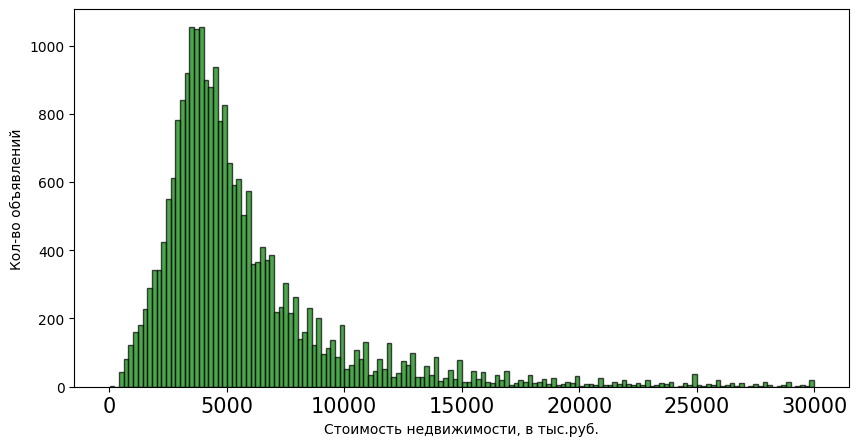

In [35]:
#Построение гистограммы по стоимости недвижимости
x = df['last_price']
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=150, 
         range=(x.min(), 30000), 
         color ='green',
        alpha = 0.7,
        edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Стоимость недвижимости, в тыс.руб.');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

Видим, что гистограмма выглядит как график нормального распределения, с единичными пиками после преодоления интервала в 7.5 млн. руб.
Наиболее часто встречаемой стоимостью недвижимости является интервал от 2.5 млн до 7.5 млн. руб. Пики приходятся приблизительно на 4.5 млн. руб. 

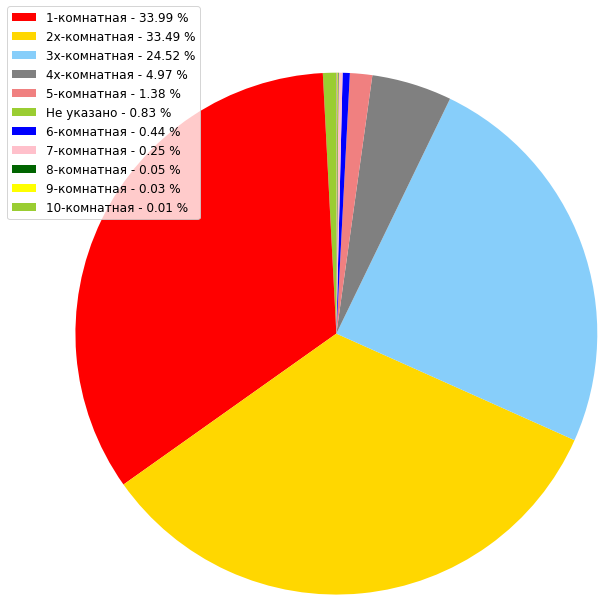

In [36]:
#Построение круговой диаграммы по количеству комнат в квартире
rooms_list = ['Не указано','1-комнатная', '2х-комнатная','3х-комнатная',
              '4х-комнатная','5-комнатная','6-комнатная','7-комнатная',
             '8-комнатная','9-комнатная', '10-комнатная']

rooms_data = (df.groupby('rooms').size() / len(df)) * 100
x = rooms_list
y = rooms_data.values

colors = ['yellowgreen','red','gold','lightskyblue','grey','lightcoral','blue','pink', 'darkgreen','yellow']
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, y)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=12)
plt.show()

Видим что в нашем датасете квартиры свыше 4 комнат уже достаточно большая редкость. Их совокупная доля составляет менее 6-8%. В остальном самыми часто встречающимися объявлениями по количеству комнат явлются однокомнатные и двухкомнатные квартиры (~33%). 25% от нашего датасета занимают трехкомнатные квартиры, и четырехкомнатные квартиры занимают всего 5% от датасета.

0    2.7
1    2.6
2    2.6
3    2.6
4    3.0
Name: ceiling_height, dtype: float64


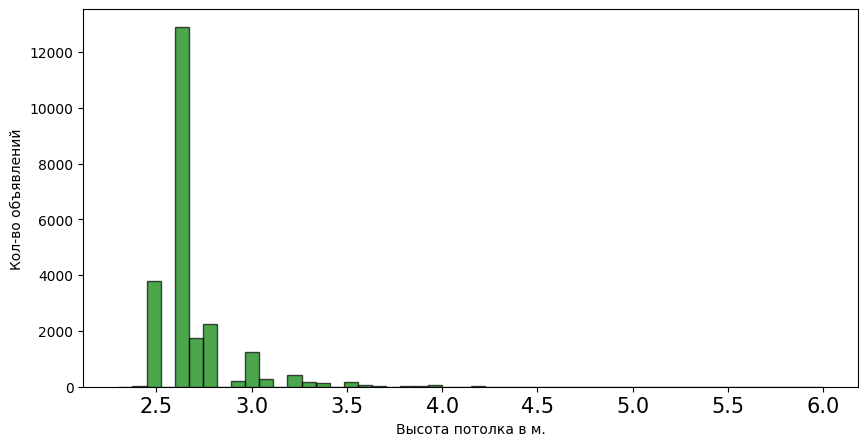

In [37]:
#Построение гистограммы по высоте потолков
x = df['ceiling_height']
print(x.head(5))
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=50, 
         range=(2.3, 6), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Высота потолка в м.');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

Видим что самыми распространёнными квартирами в нашем датасете являются квартиры с потолками от 2.5 до 3 метров. Ниже этого интервала встретить квартиру практически невозможно. А выше этого интервала квартиры встречаются достаточно редко (т.к. опять же, вполне вероятно, что это элитное жильё).


Используя эти графики, можем сделать **вывод** о усредненном описании объявления по продаже квартиры:
1. Площадь квартиры составляет от 25 до 75 кв. м.
2. Её стоимость варьируется от 2.5 до 7.5 млн. руб.
3. Количество комнат в квартире от 1 до 3-х
4. Высота потолка редко превышает значение в три метра.

<br> Реже всего публикуются объявления со следующими характеристиками квартиры:

Элитное жилье:
1. Площадь квартиры свыше 100 кв. м
2. Её стоимость превышает 10 млн. руб.
3. Количество комнат в ней более трех
4. Высота потолков скорее всего не отличается от усредненного описания, однако могут встретиться и квартиры с потолками свыше 3 метров.

Эконом жилье:
1. Площадь меньше 30 кв.м
2. Стоимость меньше 2.5 млн. руб.
3. Количество комнат вряд ли больше 2-х, либо студия
4. Высота потолков вряд ли отличается от типовых застроек, вероятно не выше 2.6 метров.

### Изучение время продажи квартиры

Для более подробного анализа времени продажи квартиры, необходимо будем рассчитать среднее и медианное значение времени с момента публикации объявления. Также построим гистограммы с различными интервалами по этому показателю

In [38]:
print('Медианное время продажи в днях =', math.ceil(df['days_exposition'].median()))
print('Среднее время продажи в днях =', math.ceil(df['days_exposition'].mean()))

Медианное время продажи в днях = 95
Среднее время продажи в днях = 181


Медианное время продажи квартиры (или снятия объявления) составляет приблизительно полгода. Вполне реальный срок для продажи недвижимости.
Среднее время продаж квартиры уже составляет всего три месяца, уже достаточно оптимистичный срок для продажи, но тоже вполне реальный.

Теперь рассмотрим данный показатель с помощью трех гистограмм, поделенных на разные интервалы для исключения различных выбросов.

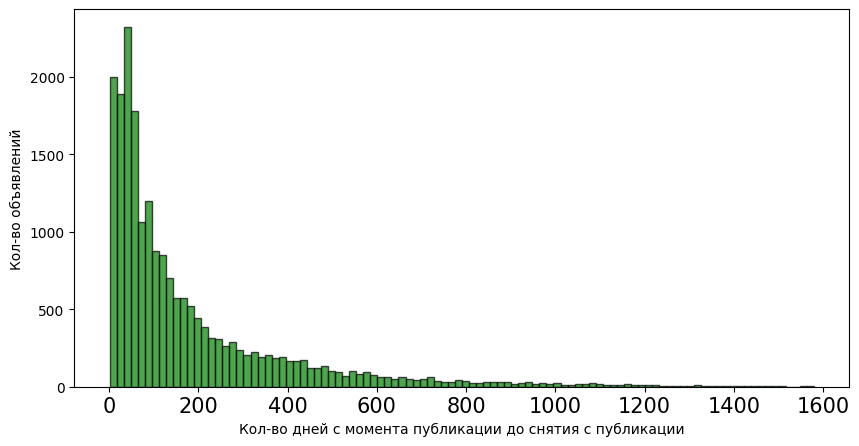

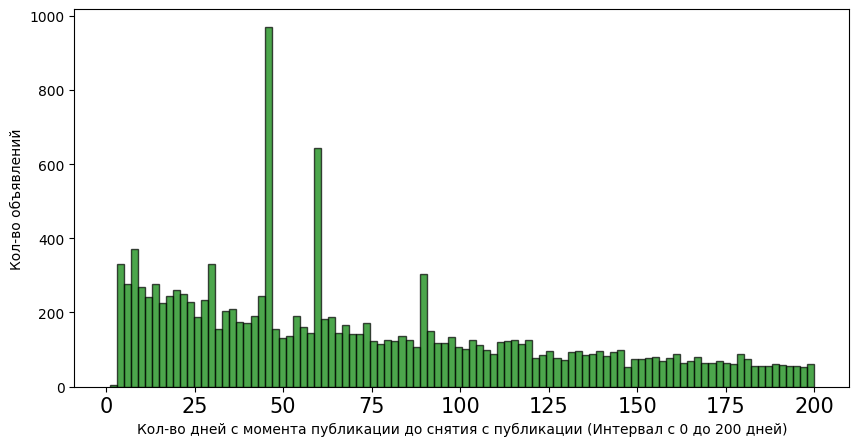

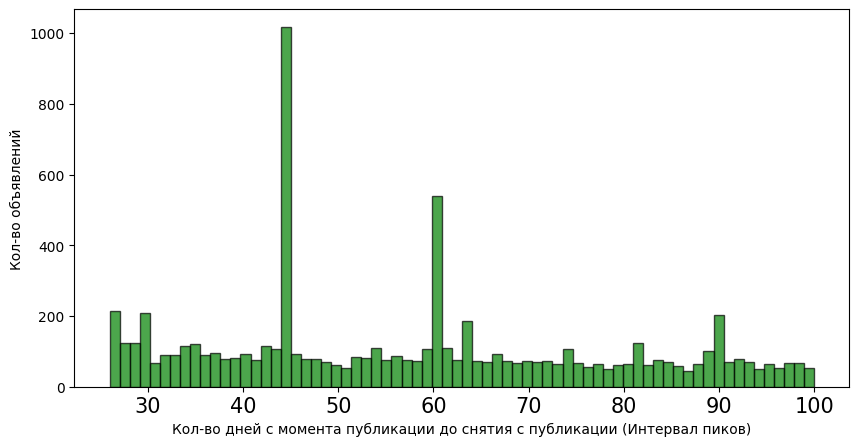

In [39]:
x = df['days_exposition']
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=100, 
         range=(x.min(), x.max()), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Кол-во дней с момента публикации до снятия с публикации');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

x = df['days_exposition']
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=100, 
         range=(x.min(), 200), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Кол-во дней с момента публикации до снятия с публикации (Интервал с 0 до 200 дней)');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

x = df.query('days_exposition > 25 and days_exposition < 100')['days_exposition']
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=70, 
         range=(x.min(), 100), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Кол-во дней с момента публикации до снятия с публикации (Интервал пиков)');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

На первом графике видно, что основная часть публикаций снималась в первые 100-120 дней. После этого интервала наблюдается плавный спад.
<br> Второй график более наглядно показывает нам, что наблюдаются пики приблизительно на 45-60-90 днях. Это может быть обосновано тем, что сервис автоматически отмечает публикации, которые не обновляются (актуализируются, поддерживаются и т.д) по истечению определенного периода.
<br> Третий график подтверждает высказанную нами гипотезу выше, пики наблюдаются конкретно на 45-60-90 днях.

**Итак, изучив время продажи квартиры, мы выявили:**

1. Среднее и медианное время продажи составляет 90 и 180 дней, соответственно, что является достаточно реальными сроками при продаже недвижимости.
2. Чаще всего встречаются объявления, у которых, с момента публикации прошло ровно 45-60-90 дней. Считаем, что это связано с критериями сервиса, который автоматически снимает с публикации объявления, если те не обновляются/актуализируются или поддерживаются по истечению этих отметок.
3. Чаще всего квартиры продаются приблизительно за полгода (170-200 дней). После преодоления этой отметки, количество объявлений резко снижается.
4. Причины сохранения объявлений, с момента публикации которых прошло больше 2-3х лет нам неизвестны. Это может быть как действительно затянувшаяся продажа недвижимости, либо достаточно редкое жилье (особые характеристики, высокие потолки, неудачный район, элитное жилье и т.д).

<br> Теперь переходим к изучению конкретных факторов, которые в наибольшей степени влияют на стоимость квартиры.

### Изучение факторов, влияющих на стоимость квартиры

Для этого, построим коррелограмму, которая покажет нам зависимость каждого из фактора от других

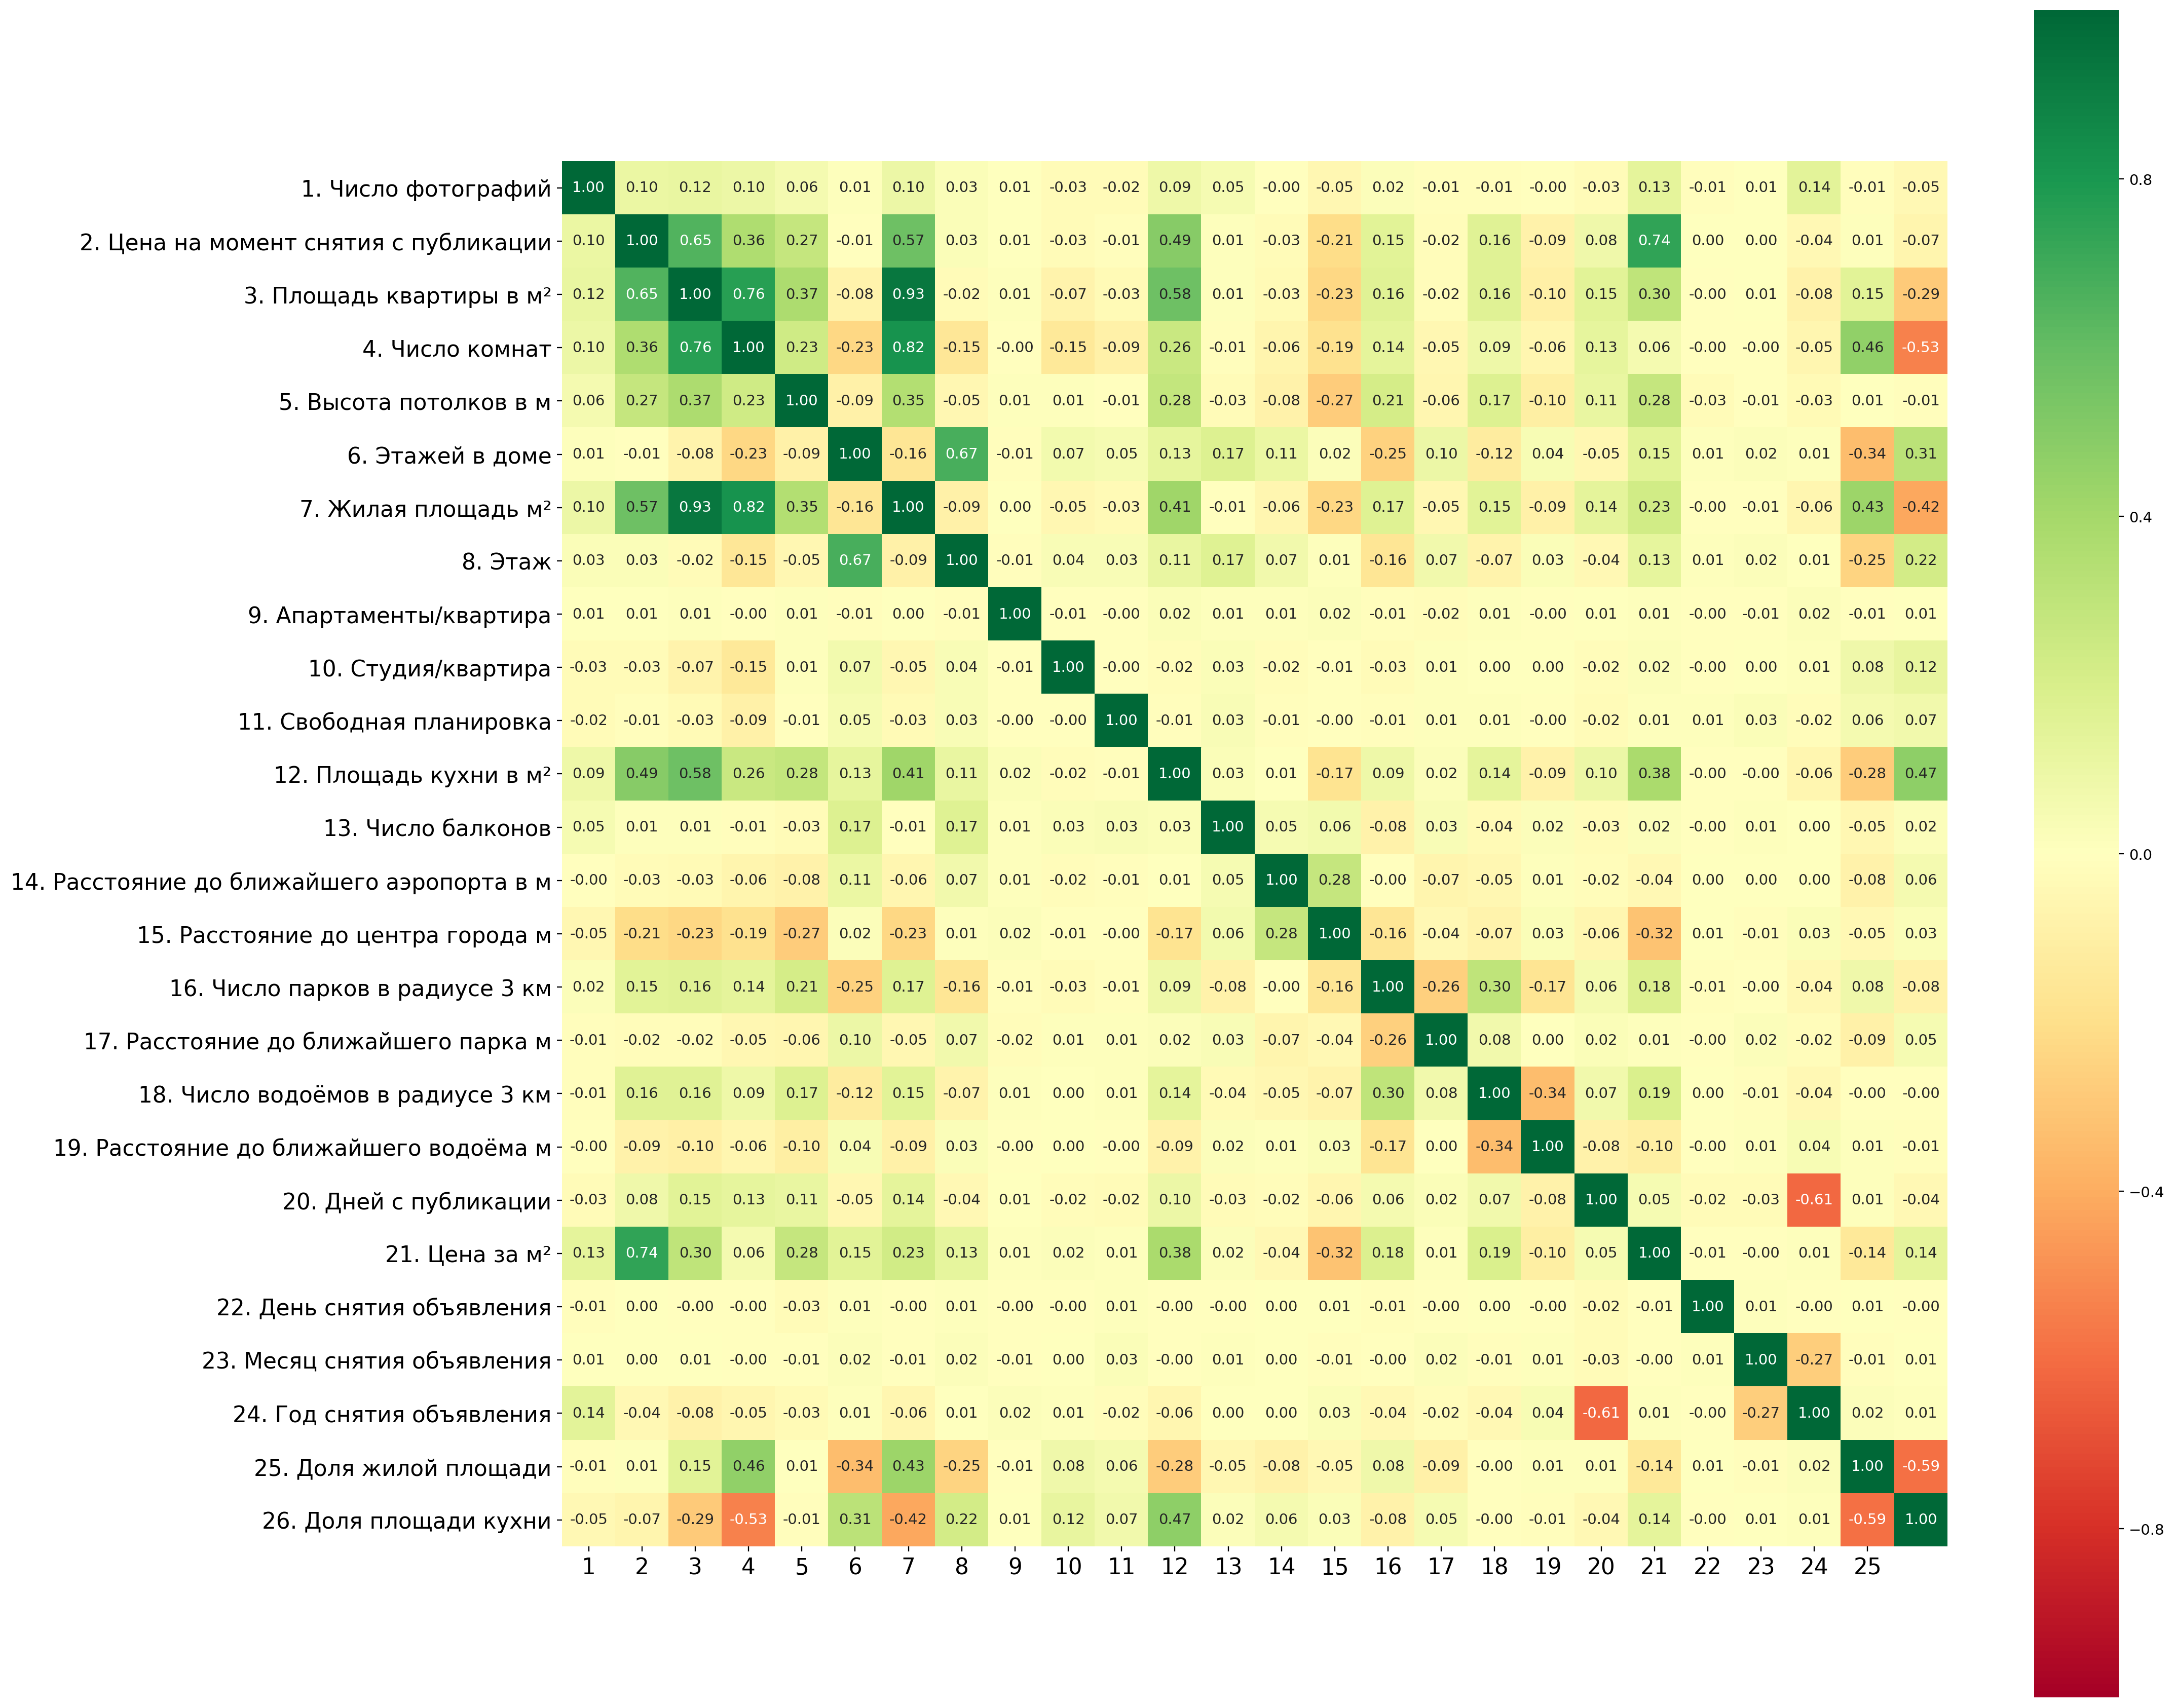

In [40]:
correl_columns_y = ['1. Число фотографий', '2. Цена на момент снятия с публикации', '3. Площадь квартиры в м²', 
                  '4. Число комнат', '5. Высота потолков в м', '6. Этажей в доме', '7. Жилая площадь м²', 
                  '8. Этаж', '9. Апартаменты/квартира', '10. Студия/квартира', '11. Свободная планировка',
                  '12. Площадь кухни в м²', '13. Число балконов', '14. Расстояние до ближайшего аэропорта в м',
                  '15. Расстояние до центра города м', '16. Число парков в радиусе 3 км', '17. Расстояние до ближайшего парка м', 
                  '18. Число водоёмов в радиусе 3 км', '19. Расстояние до ближайшего водоёма м', '20. Дней с публикации',
                  '21. Цена за м²', '22. День снятия объявления', '23. Месяц снятия объявления', '24. Год снятия объявления', '25. Доля жилой площади', '26. Доля площади кухни']

correl_columns_x = list(range(1, 26))
plt.figure(figsize=(21,21), dpi= 210)

sns.heatmap(df.corr(), xticklabels = correl_columns_x, yticklabels=correl_columns_y, 
            cmap='RdYlGn', center=0, annot=True, fmt='.2f', vmin=-1, vmax=1, square = True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Поближе рассмотрим необходимый нам столбец 'last_price':

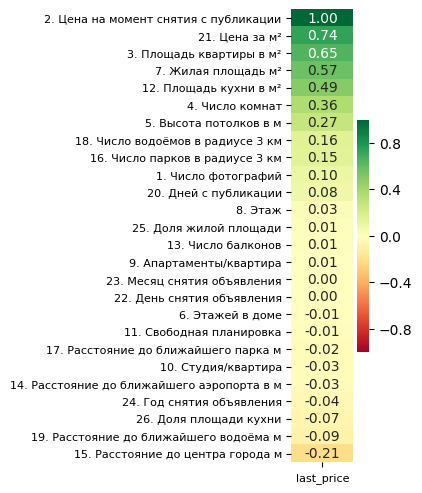

In [41]:
corr_lastprice = df.corr()[['last_price']]
corr_lastprice.index = correl_columns_y
corr_lastprice = corr_lastprice.sort_values(by = 'last_price', ascending = False)

plt.figure(figsize=(1,6), dpi = 100)
sns.heatmap(corr_lastprice, cmap='RdYlGn', 
            center=0, annot=True, annot_kws={'size':10}, fmt='.2f', vmin=-1, vmax=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

С помощью графика видим, что на повышение стоимости квартиры больше всего влияют:
1. Цена за квадратный метр (что очевидно)
2. Площадь квартиры, кухни, жилой площади, число комнат (что также очевидно)
3. Высота потолков также имеет небольшое влияние на конечную цену
4. Также имеет влияние на конечную цену число парков и водоемов в ближайшей доступности, и качество самого объявления (число фотографий и прошедший период с момента публикации)

Все остальные параметры не имееют весомого влияния на стоимость квартиры, выделяется лишь один параметр - расстояние до центра города. По нему коэффциент корреляции является отрицательным, т.е. чем более удалённа квартира от центра города, тем она падает в цене (что тоже достаточно очевидно). 

<br> Теперь рассмотрим зависимость стоимости квартиры от площади:
Для построения графика, нам необходимо будет разделить квартиры на категории для удобства. Поэтому сначала взглянем на ящик с усами по площади квартиры

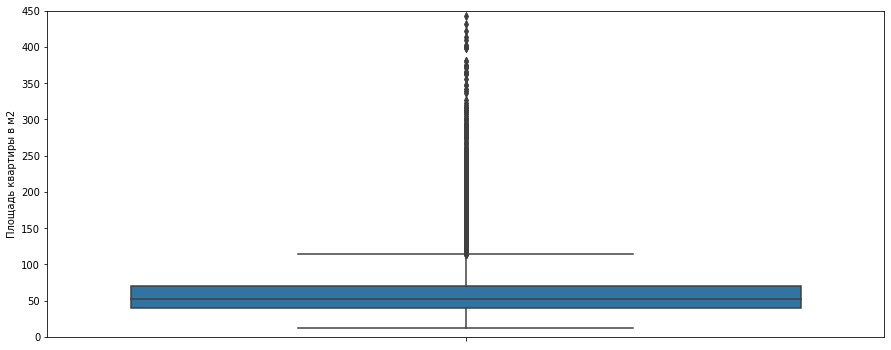

In [42]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['total_area'])
plt.ylabel("Площадь квартиры в м2")
plt.ylim(0, 450)
plt.show()

Видим что третий квартиль находится на границе 125м, первый квартиль около 15м., поэтому за нижнюю и верхнюю границу наших категорий возьмем именно эти показатели. Оставшиеся категории получим таким же образом, используя интервалы от медианы до границ ящика.
Поэтому разобъем квартиры на пять категорий:
<br>       • Типовые эконом (от 15 до 40 кв.м) (1)
<br>       • Типовые средние (от 40 до 60 кв.м) (2)
<br>       • Комфорт средние (от 60 до 80 кв.м) (3)
<br>       • Комфорт премиум (от 80 до 120 кв.м) (4)
<br>       • Комфорт люкс (свыше 120 кв.м) (5)

Создадим для этого функцию, которая впишет категорию площади квартиры в новый столбец нашего датасета

In [43]:
def total_area_categorize(total_area):
    if total_area < 40:
        return "От 15 до 40 кв.м"
    elif total_area >= 40 and total_area < 60:
        return "От 40 до 60 кв.м"
    elif total_area >= 60 and total_area < 80:
        return "От 60 до 80 кв.м"
    elif total_area >= 80 and total_area < 120:
        return "От 80 до 120 кв.м"
    else:
        return "Свыше 120 кв.м"

# Применим функцию, и проверим её работоспособность
df['area_category'] = df['total_area'].apply(total_area_categorize)
display(df['area_category'].value_counts())

От 40 до 60 кв.м     9047
От 15 до 40 кв.м     5715
От 60 до 80 кв.м     4965
От 80 до 120 кв.м    2803
Свыше 120 кв.м       1095
Name: area_category, dtype: int64

Теперь построим диаграмму разброса, используя полученные категории:

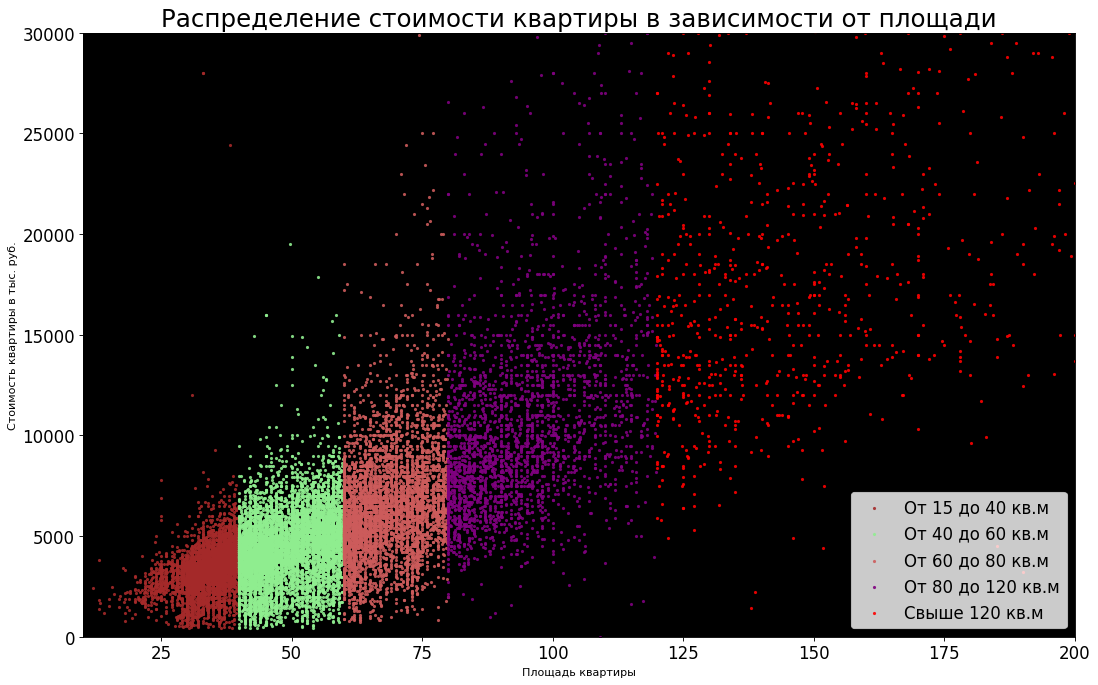

In [44]:
categories = np.unique(df['area_category'])

colors = ['darkgreen', 'teal', 'indigo', 'chocolate', 'gold']
colors = ['brown', 'lightgreen', 'indianred', 'purple', 'red']

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('total_area', 'last_price', 
                data=df.loc[df['area_category']==category, :], 
                s=7.5, 
                c=[colors[i]], 
                label=str(category),
                alpha = 0.9,
                linewidths = 0.1)

plt.gca().set(xlim=(10, 200), ylim=(0, 30000),
              xlabel='Площадь квартиры', 
              ylabel='Стоимость квартиры в тыс. руб.')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Распределение стоимости квартиры в зависимости от площади", fontsize=22)
plt.legend(fontsize=15)    
ax = plt.gca()
ax.set_facecolor('black')
plt.show() 

Видим что наибольший разброс в цене наблюдается у квартир свыше 80 кв.м. У квартир с такой площадью цена может варьироваться от 5 млн. до 30 млн. руб.
<br>Квартиры от 15 до 60 кв.м обычно не превышают стоимость в размере 7.5 млн. руб.
<br>С квартирами от 60 до 80 кв.м намного сложнее, их цена сильно варьируется, и может быть как 2.5 млн, так и 15 млн. руб.

<br> Теперь рассмотрим зависимость цены от количества комнат в квартире.

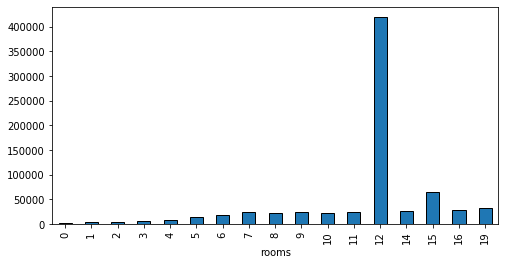

In [45]:
rooms_group = df.groupby('rooms').median()['last_price']
rooms_group.plot(x='rooms', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(8,4))
plt.show()

Избавимся от выброса в виде 12 и 15 комнатных квартиры

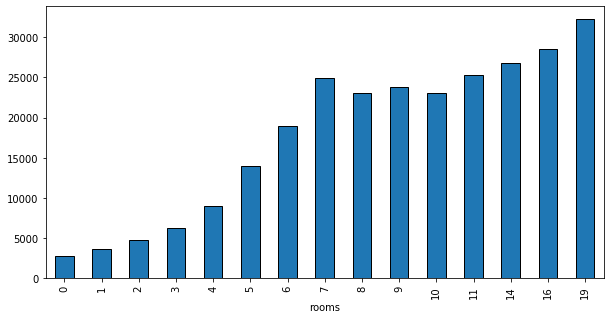

In [46]:
rooms_group = df.query('rooms != 12 and rooms != 15').groupby('rooms').median()['last_price']
rooms_group.plot(x='rooms', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

Вывод достаточно очевиден, чем больше комнат, тем дороже стоимость кватиры. Однако свыше семикомнатных квартир - такой ярковыраженной тенденции не наблюдается, что вполне объяснимо тем, что свыше в квартирах семи комнат цена определяется далеко не от большего количества комнат (например, это может быть загородный дом, пентхаус, любое другое элитное жилье).

Теперь посмотрим на зависимость цены и удалённости от центра города:

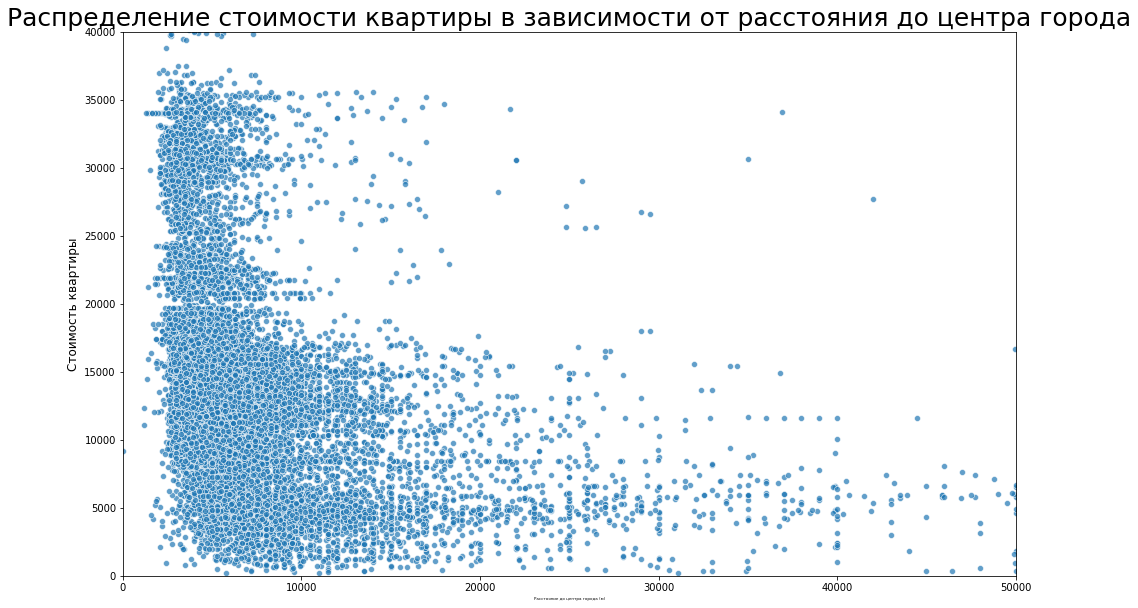

In [47]:
colors = ['brown', 'lightgreen', 'indianred', 'purple', 'red']
citycentre_df = df[df['cityCenters_nearest'].notna() == True]

plt.figure(figsize = (16,10))

sns.scatterplot(
    data=citycentre_df, 
    y='cityCenters_nearest', 
    x='last_price',
    alpha = 0.7)

plt.gca().set(xlim=(0, 50000), ylim=(0, 40000),
              ylabel='Площадь квартиры', 
              xlabel='Стоимость квартиры в тыс. руб.')

plt.title("Распределение стоимости квартиры в зависимости от расстояния до центра города", fontsize = 25) # title of scatter plot
plt.xlabel("Расстояние до центра города (м)", fontsize = 4) # x-axis label
plt.ylabel("Стоимость квартиры", fontsize = 12) # y-axis label
plt.show()

<br> С помощью графика сильно отличается интервал от 500 метров до ~5-6 тыс. метров. Именно в нём наблюдаются наибольшее количество дорогих квартир. Данный интервал будем использовать в следующем подпункте для анализа сегмента квартир в центре.
<br>Также можем наблюдать тенденцию снижения стоимости квартиры при удалении от центра города. Данный вывод также подтверждает полученная нами выше коррелограмма.

<br> Теперь рассмотрим зависимость стоимости квартиры от этажа, на котором она расположена

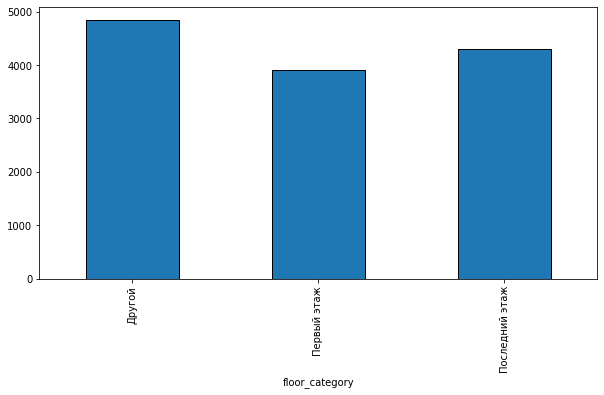

In [48]:
floor_group = df.groupby('floor_category').median()['last_price']
floor_group.plot(x='floor', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

**Вывод по зависимости стоимости недвижимости от категории этажа:**

Видим что в зависимости от категории этажа, дешевле всего стоят квартиры на первом этаже, на последнем этаже квартиры занимают середину в нашем распределении. Квартиры на любых других этажах стоят существенно дороже: примерно на 1 млн. дороже чем квартира на первом этаже, и примерно на 500 тыс. дороже чем квартира на последнем этаже.

<br> Также подробнее расмотрим зависимость стоимости квартиры от даты публикации по дням, месяцам, и годам.

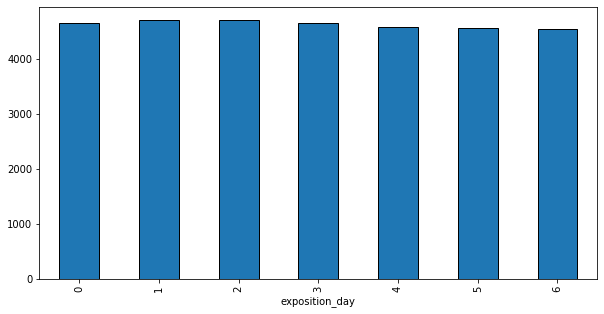

In [49]:
floor_group = df.groupby('exposition_day').median()['last_price']
floor_group.plot(x='exposition_day', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

Видим, что от дня недели размещения объявления цена квартиры практически не зависит, колебания минимальные. Однако всё же в понедельник стоимость квартиры снижается, к среде набирает максимальную стоимость и после этого стоимость стабилизируется. Даже несмотря на такие колебания, они незначительны и составляют ~20-50 тыс.

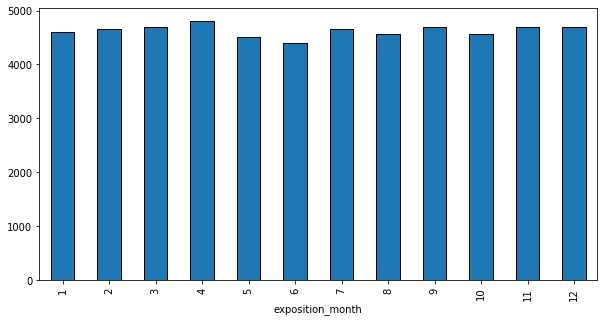

In [50]:
floor_group = df.groupby('exposition_month').median()['last_price']
floor_group.plot(x='exposition_month', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

Видим что с начала года цена плавно возрастает, набирает свой максимум к апрелю, к началу лета наблюдается спад, и после этого ситуация стабилизируется. Скорее всего, это связано, с началом периода отпусков, спрос снижается и  и большинство людей не готовы продавать свои квартиры по более низкой ценой чем спустя пару месяцев.


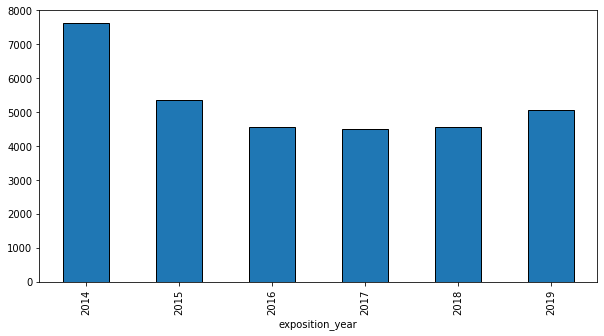

In [51]:
floor_group = df.groupby('exposition_year').median()['last_price']
floor_group.plot(x='exposition_year', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

По годам видим что наиболее дорогая недвижимость была в 2014 г., что связано с валютным кризисом в России, сильно возрос спрос на недвижимость в связи с политической и экономической нестабильность, что и вызвало рост цен.

**Изучив время продажи отдельно по дням/месяцам/годам, выявили, что:**
1. От дня публикации объявления стоимость недвижимости практически не зависит, колебания составляют от 20 до 50 тыс. К среде стоимость набирает свое максимальное значение, и после этого в течении недели плавно снижается. С наступлением новой недели - цена вновь возрастает. 
2. По месяцам колебания стоимости недвижимости уже более заметны - между максимальным и минимальным значением разница приблизительно в 250-300 тысяч. К апрелю стоимость набирает максимальное значение, потом происходит резкий спад до июля, и после этого цена вновь постепенно растёт. Связано это, скорее всего, с началом периода отпусков, большинство людей заняты своим отдыхом и откладывают такое важное решение как продажа квартиры на поздний срок. Начало роста цен, одновременно с наступлением нового года, может быть связано с тем, что в декабре многим выдают крупные премии, которые как раз таки за 90-120 дней преобразуются в покупку недвижимости.
3. По годам картина в целом выглядит достаточно стабильно, за исключением 2014 года, в котором произошел валютный кризис. Это и спровоцировало рост цен на недвижимость. Так как в таких экономически нестабильных условиях - вложиться в недвижимость это достаточно рациональное решение.

<br> Теперь рассмотрим топ-10 населенных пунктов по количеству объявлений и медианной ценой за квадратный метр.

In [52]:
top10_localities = df.pivot_table(index='locality_name', values = 'price_per_m2', aggfunc = ['count', 'median'])
top10_localities = top10_localities.sort_values(('count', 'price_per_m2'), ascending = False)
top10_localities.columns = ['Количество объявлений', 'Медианная цена за м2']
display(top10_localities.head(10))

top10_localities = top10_localities.sort_values(('Медианная цена за м2'), ascending = False)
display(top10_localities.head(10))

,Количество объявлений,Медианная цена за м2
locality_name,,
Санкт-Петербург,15706,104767.5
посёлок Мурино,520,85889.5
посёлок Шушары,440,76876.0
Всеволожск,398,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
посёлок Парголово,327,91642.0
Гатчина,306,67860.0
деревня Кудрово,299,91860.0


,Количество объявлений,Медианная цена за м2
locality_name,,
посёлок Лисий Нос,2,121615.5
Санкт-Петербург,15706,104767.5
Зеленогорск,24,101666.5
Пушкин,369,100000.0
Кудрово,173,100000.0
Сестрорецк,183,99678.0
посёлок Левашово,1,96997.0
деревня Кудрово,299,91860.0
посёлок Парголово,327,91642.0


Как видно из полученных результатов, наибольшее количество объявлений приходится на Санкт-Петербург, наибольшая медианная цена также приходится на Санкт-Петербург (посёлок Лисий Нос необъективно считать за самый дорогой населенный пункт, так как там было всего два объявления).



Вне Санкт-Петербурга, самым дорогим по стоимости недвижимости можем считать Зеленогорск, Пушкин, Кудрово, Сестрорецк. Медианная цена в этих населенных пунктах превышает нижестоящие почти на 10%. Самыми популярными населенными пунктами вне Санкт-Петербурга считаются посёлок Мудрино, Шушары, Всеволожск, Пушкин и Колпово. Причина популярности кроется в том, что в них достаточно дешевая стоимость за квадратный метр (за исключением Пушкина), по сравнению с Санкт-Петербургом и другими населенными пунктами.

Теперь выделим квартиры в Санкт-Петербурге, используем полученный выше интервал для центральной зоны, 

In [53]:
colors = ['darkgreen', 'teal', 'indigo', 'chocolate', 'gold']
colors = ['brown', 'lightgreen', 'indianred', 'purple', 'red']
citycentre_df = df[df['cityCenters_nearest'].notna() == True]
citycentre_df = citycentre_df.query('locality_name == "Санкт-Петербург"')
citycentre_df['cityCenters_nearest_km'] = (citycentre_df['cityCenters_nearest'] / 1000).round()
citycentre_df['price_per_km'] = (citycentre_df['last_price'] / citycentre_df['cityCenters_nearest_km'])

cityCenters_group = citycentre_df.groupby('cityCenters_nearest_km').median()['price_per_km']

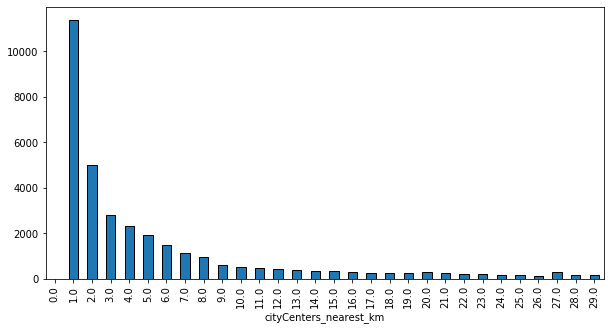

In [54]:
cityCenters_group.plot(x='cityCenters_nearest_km', 
                 y="price_per_km", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

Для выделения сегмента квартир в центре будем использовать интервал от 0 до 5 км от центра города, создадим для этого отдельный срез и сразу же рассмотрим график частоты публикаций объявлений в центре Санкт-Петербурга

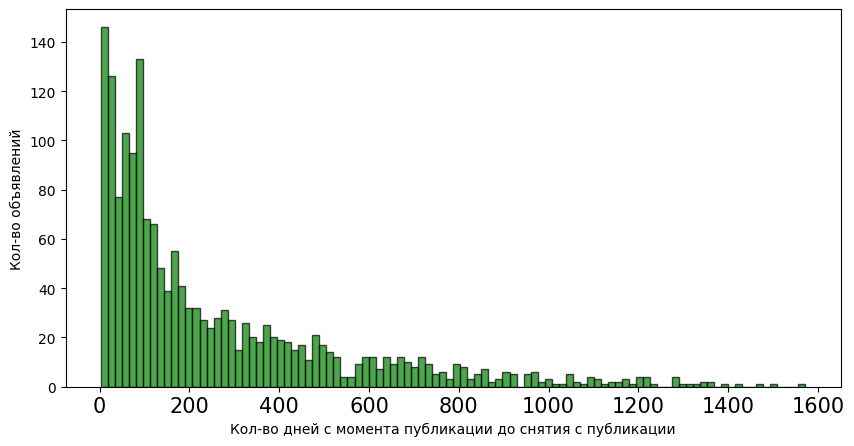

In [55]:
spb_centre = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 5000')

x = spb_centre['days_exposition']
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=100, 
         range=(x.min(), x.max()), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Кол-во дней с момента публикации до снятия с публикации');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

Видим что картина не сильно отличается от нашего общего датасета. Также наблюдаются пики на 45-60-90 днях. Также наблюдается последовательный спад с увеличением интервала от дня публикации до дня снятия с публикации.

<br> Теперь рассмотрим график частоты объявлений в зависимости от площади квартиры:

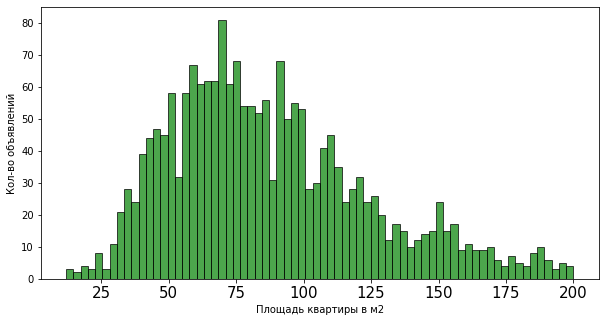

In [56]:
x = spb_centre['total_area']
plt.figure(figsize=(10, 5))
plt.hist(x, bins=70, 
         range=(x.min(), 200), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Площадь квартиры в м2');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

Здесь же картина уже сильно отличается, от того что мы видели, рассматривая график по всему датасету.
Чаще всего в центре Санкт-Петербурга выставляют на продажи крупные квартиры (от 50 до 100 кв.м), маленькие квартиры (до 35 кв.м) здесь редкость. Также достаточно часто выставляют квартиры более 100 кв.м

<br> Теперь рассмотрим распределение частоты объявлений в зависимости от высоты потолка в квартире.

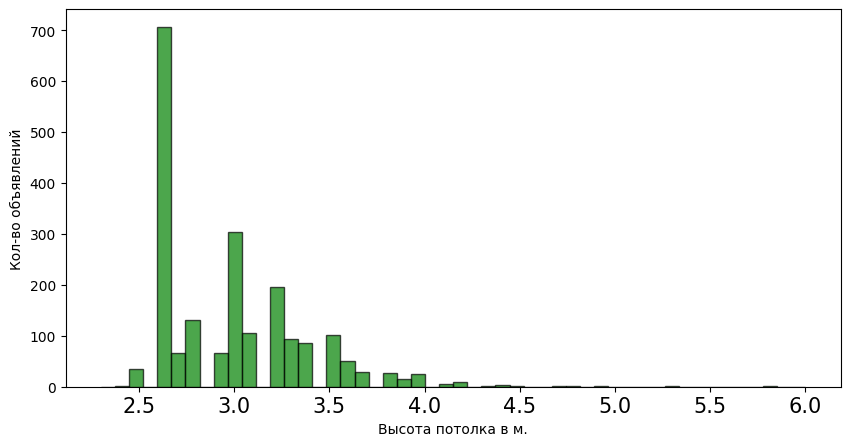

In [57]:
x = spb_centre['ceiling_height']
plt.figure(figsize=(10, 5), dpi = 100)
plt.hist(x, bins=50, 
         range=(2.3, 6), 
         color ='green',
         alpha = 0.7,
         edgecolor = 'black')
plt.ylabel('Кол-во объявлений')
plt.xlabel('Высота потолка в м.');
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.show()

В среднем в центре Санкт-Петербурга квартиры с высокими потолками встречаются чаще, чем в целом по нашему датасету. Также здесь достаточно часто встречаются объявления с квартирами, в которых потолки находятся в интервале от 3 до 3.5 метров.

<br> Теперь рассмотрим зависимость цены от количества комнат в центре Санкт-Петербурга:

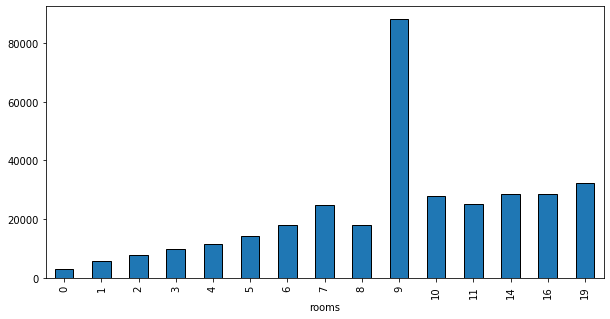

In [58]:
rooms_group = spb_centre.query('rooms != 12 and rooms != 15').groupby('rooms').median()['last_price']
rooms_group.plot(x='rooms', 
                 y="last_price", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(10,5))
plt.show()

Видим что картина в целом не отличается, за исключением того, что теперь цена продолжает расти до семикомнатных квартир, после этого (за исключением выброса в виде восьми и девятикомнатной квартиры) цена относительно стабилизируется, и уже не так сильно влияет на конечную стоимость.

Теперь рассмотрим диаграмму разброса цены в зависимости от площади квартиры в центре Санкт-Петербурга:

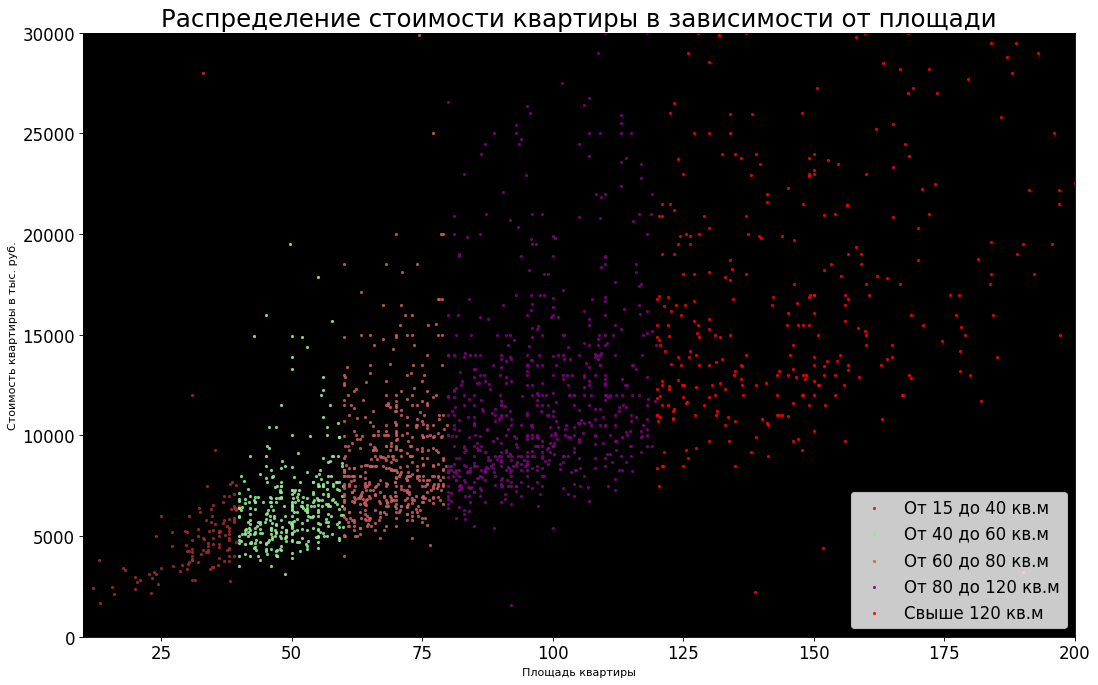

In [59]:
categories = np.unique(spb_centre['area_category'])

colors = ['darkgreen', 'teal', 'indigo', 'chocolate', 'gold']
colors = ['brown', 'lightgreen', 'indianred', 'purple', 'red']

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('total_area', 'last_price', 
                data=spb_centre.loc[spb_centre['area_category']==category, :], 
                s=7.5, 
                c=[colors[i]], 
                label=str(category),
                alpha = 0.9,
                linewidths = 0.1)

plt.gca().set(xlim=(10, 200), ylim=(0, 30000),
              xlabel='Площадь квартиры', 
              ylabel='Стоимость квартиры в тыс. руб.')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Распределение стоимости квартиры в зависимости от площади", fontsize=22)
plt.legend(fontsize=15)    
ax = plt.gca()
ax.set_facecolor('black')
plt.show() 

Видим что квартиры очень сильно различаются по цене, даже в своих категориях. Цена у самых маленьких квартир (от 15 до 40 кв.м) может варьироваться от 1 млн. до 7.5 млн. У квартир среднего сегмента (от 40 до 80 кв.м) цена разбросана от 5 млн. до 12.5 млн. Квартиры элитного сегмента (свыше 80 кв. м) в среднем начинаются от 7.5 млн. и могут достигать 25 млн. руб.

<br> И в последнюю очередь, рассмотрим коррелограмму по квартирам в центре Санкт-Петербурга

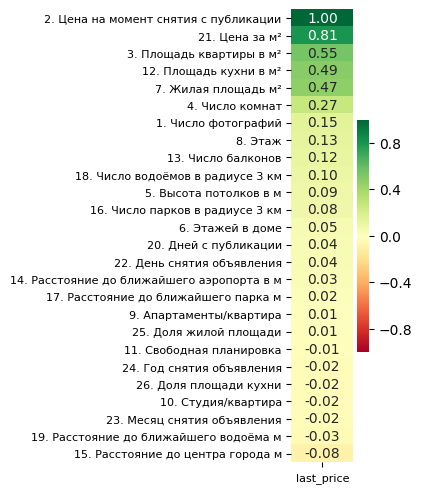

In [60]:
correl_columns_y = ['1. Число фотографий', '2. Цена на момент снятия с публикации', '3. Площадь квартиры в м²', 
                  '4. Число комнат', '5. Высота потолков в м', '6. Этажей в доме', '7. Жилая площадь м²', 
                  '8. Этаж', '9. Апартаменты/квартира', '10. Студия/квартира', '11. Свободная планировка',
                  '12. Площадь кухни в м²', '13. Число балконов', '14. Расстояние до ближайшего аэропорта в м',
                  '15. Расстояние до центра города м', '16. Число парков в радиусе 3 км', '17. Расстояние до ближайшего парка м', 
                  '18. Число водоёмов в радиусе 3 км', '19. Расстояние до ближайшего водоёма м', '20. Дней с публикации',
                  '21. Цена за м²', '22. День снятия объявления', '23. Месяц снятия объявления', '24. Год снятия объявления', '25. Доля жилой площади', '26. Доля площади кухни']


corr_lastprice = spb_centre.corr()[['last_price']]
corr_lastprice.index = correl_columns_y
corr_lastprice = corr_lastprice.sort_values(by = 'last_price', ascending = False)

plt.figure(figsize=(1,6), dpi = 100)
sns.heatmap(corr_lastprice, cmap='RdYlGn', 
            center=0, annot=True, annot_kws={'size':10}, fmt='.2f', vmin=-1, vmax=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

На цену квартиры в центре Санкт-Петербурга первые пять факторов не отличаются от факторов, влияющих на цену квартиры в целом по нашему датасету. Однако в центре Петербурга на цену квартиры уже также имеет влияние качество самого объявления (число фотографий), этаж квартиры, число балконов, инфраструктура вокруг (число водоемов, парков), и высота потолков. 

Составив выборку по центру Санкт-Петербурга итого получаем:
1. Квартиры здесь продаются чуть быстрее чем в целом по нашему датасету.
2. Площадь квартир серьезно отличается от тех, что публикуются в целом по датасету - чаще всего выставляют средние квартиры (от 50 до 100 кв. м), найти маленькую квартиру здесь достаточно сложно. Также чаще появляются квартиры больших размеров (свыше 100 кв.м)
3. Квартиры с высокими потолками (свыше 2.6 м) встречаются чаще чем в целом по датасету, также проще найти квартиру с потолками свыше 3 метров и даже свыше 3.5 метров.
4. По количеству комнат стоимость недвижимости в центре Санкт-Петербурга растёт вплоть до семикомнатных квартир. После этого цена стабилизируется.
5. Разброс стоимости в зависимости от площади также серьезно отличается от того что мы видели в целом по датасету. Цены за маленькие квартиры (до 40 кв.м) варьируются от 2.5 до 7.5 млн. За средние (до 60кв.) от 5 до 10 млн. Свыше 60 кв.м квартиры очень сильно разняться в цене, до 120 кв.м цены могут начинаться с 5 млн и достигать 30 млн. Минимальная средняя стоимость квартиры от 120 кв. м в центре Санкт-Петербурга составляет 10 млн. руб.

## Итоговый вывод:

Проведенное нами исследование, позволяет сделать следующие выводы:
<br>1. Разработанная система вычисления расстояния до центра города, аэропорта, парков/водоемов, а также подсчета количества парков и водоемов поблизости - переодически даёт сбой.
<br>2. Среднестатистическая недвижимость, выставленная через сервис на продажу имеет следующие характеристики:
<br> ·  ·  ·     2.1. Площадь недвижимости составляет от 25 до 75 кв.м
<br> ·  ·  ·     2.2. Стоимость варьируется от 2.5 до 7.5 млн. руб.
<br> ·  ·  ·     2.3. В квартире не более трех комнат включительно
<br> ·  ·  ·     2.4. Высота потолков является типовой - не превышает 3 метров.
<br>3. Чаще всего квартиры продаются в интервале от 90 до 180 дней, за исключением редких случаев в виде нескольких лет. 
<br> ·  ·  ·     3.1. По дням колебания в стоимости практически отсутствует. 
<br> ·  ·  ·     3.2.По месяцам присутствует рост стоимости до апреля, к середине лета наблюдается спад, и до конца года стоимости недвижимости находится приблизительно на одном уровне. 
<br> ·  ·  ·     3.3. Мы объяснили рост стоимости к апрелю следующим образом. Это связано с  началом периода отпусков, большинство людей заняты своим отдыхом и откладывают такое важное решение как продажа квартиры на поздний срок. Начало роста цен, одновременно с наступлением нового года, может быть связано с тем, что в декабре многим выдают крупные премии, которые как раз таки за 90-120 дней преобразуются в покупку недвижимости.
<br> ·  ·  ·     3.4. По годам стоимость недвижимости выделялась лишь в 2014г., это было связано с валютным кризисом в России и резким повышением спроса на недвижимость. 
<br>4. Проанализировав выборку объявлений в центре Санкт-Петербурга, выявили следующие особенности: квартиры здесь продаются чуть быстрее чем в целом по датасету, площадь квартир также сильно отличается, квартиры с высокими потолками встречаются чаще, и разброс стоимости в зависимости от площади куда сильнее чем в целом по датасету. Дополнительными факторами, влияющими на цену здесь являются качество объявления, этаж квартиры, количество этажей в доме, число балконов, инфраструктура района, а также высота потолков.
<br>5. Решающими факторами в определении стоимости недвижимости в нашем датасете являются: цена за кв.м, площадь квартиры, площадь кухни, количество комнат, число водоемов и парков поблизости, а также близость к центру города. Оставшиеся факторы, например, этаж квартиры, количество этажей в доме, свободная планировка, расстояние до аэропорта, практически не оказывают никакого существенного влияния на конечную стоимость.

